In [1]:
from pamod.wrapper import BenchmarkWrapper

wrapper = BenchmarkWrapper(
    task="improve",
    encodings=["one_hot"],
    learners=["xgb", "rf", "lr"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo"],
    criteria=["f1"],
    sampling=[None],
    n_configs=5,
    n_jobs=-1,
)

wrapper.baseline()

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,Dummy Classifier,one_hot,0.000000,0.000000,0.000000,0.712523,0.204865,0.500000,"[[0, 1095], [0, 2714]]",None
1,Logistic Regression,one_hot,0.175038,0.525114,0.105023,0.715411,0.195039,0.642057,"[[115, 980], [104, 2610]]",None
2,Random Forest,one_hot,0.146453,0.444444,0.087671,0.706222,0.200429,0.611289,"[[96, 999], [120, 2594]]",None


In [2]:
benchmark, learners = wrapper.wrapped_benchmark()

In [3]:
benchmark

,Task,Learner,Tuning,HPO,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,improve,xgb,holdout,hebo,f1,None,None,0.4474,0.2882,1.0000,0.2898,0.1996,0.6395,"[[1095, 0], [2705, 9]]",0.99
1,improve,rf,holdout,hebo,f1,None,None,0.4385,0.2842,0.9589,0.2940,0.2404,0.6300,"[[1050, 45], [2644, 70]]",0.78
2,improve,lr,holdout,hebo,f1,None,None,0.4613,0.3032,0.9644,0.3526,0.2455,0.6410,"[[1056, 39], [2427, 287]]",0.69


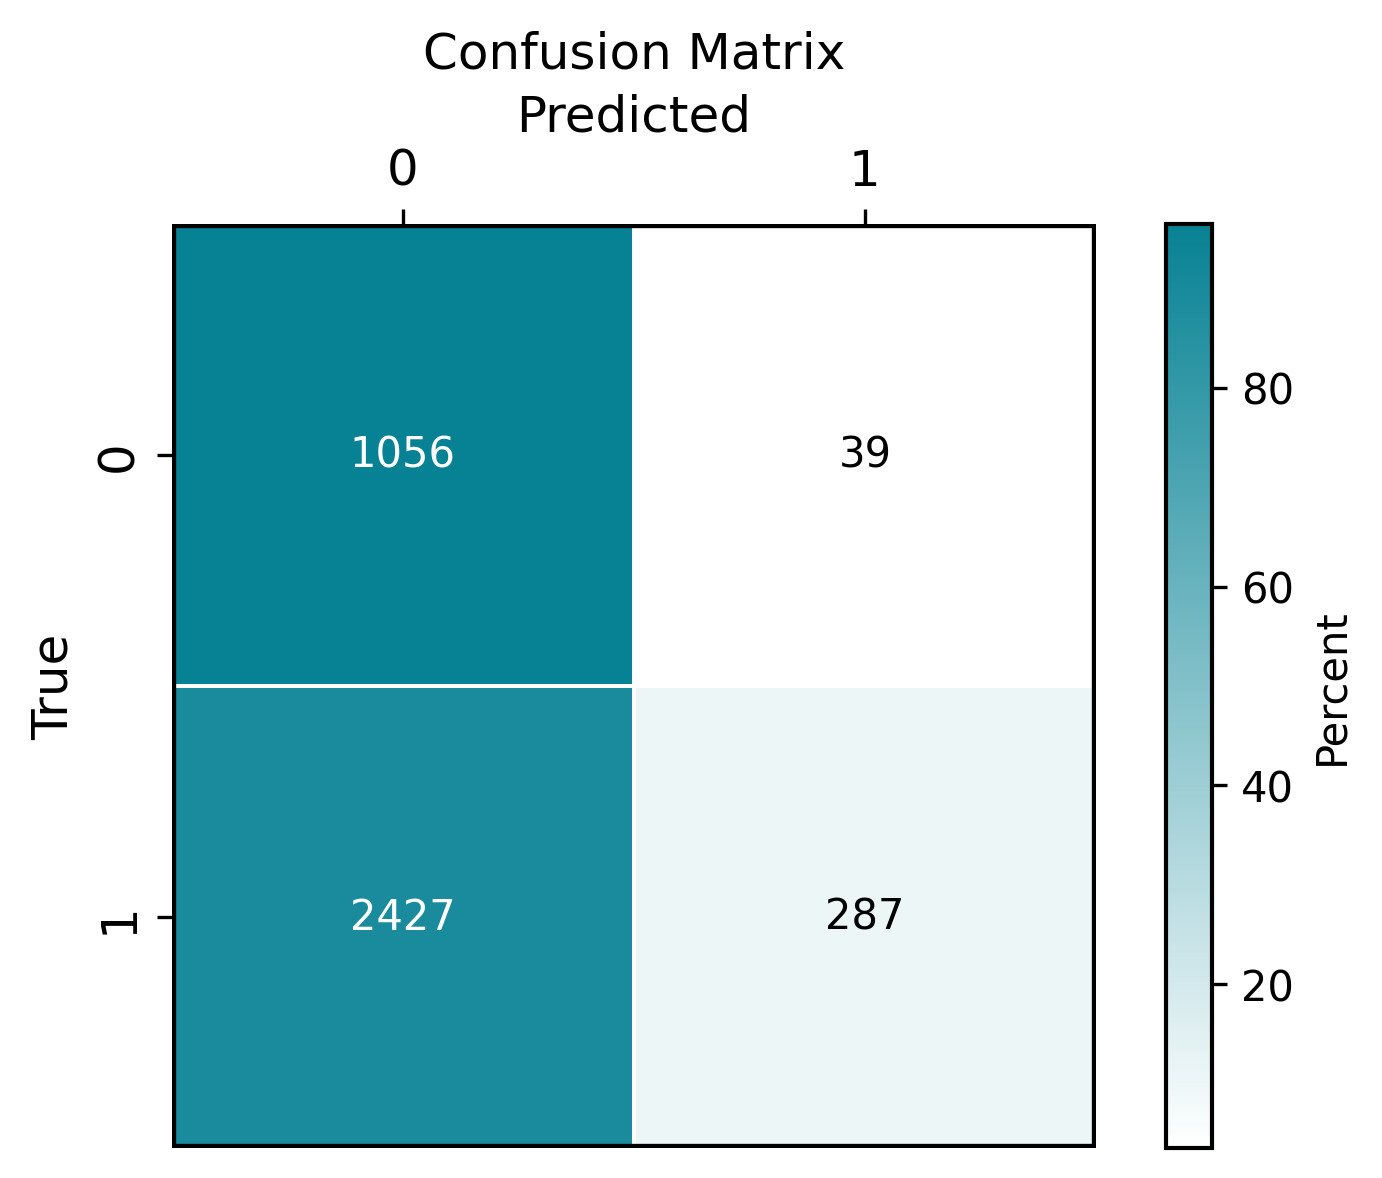

Average and Median Brier Scores by y:
   y      mean    median
0  0  0.210643  0.191278
1  1  0.259617  0.252201


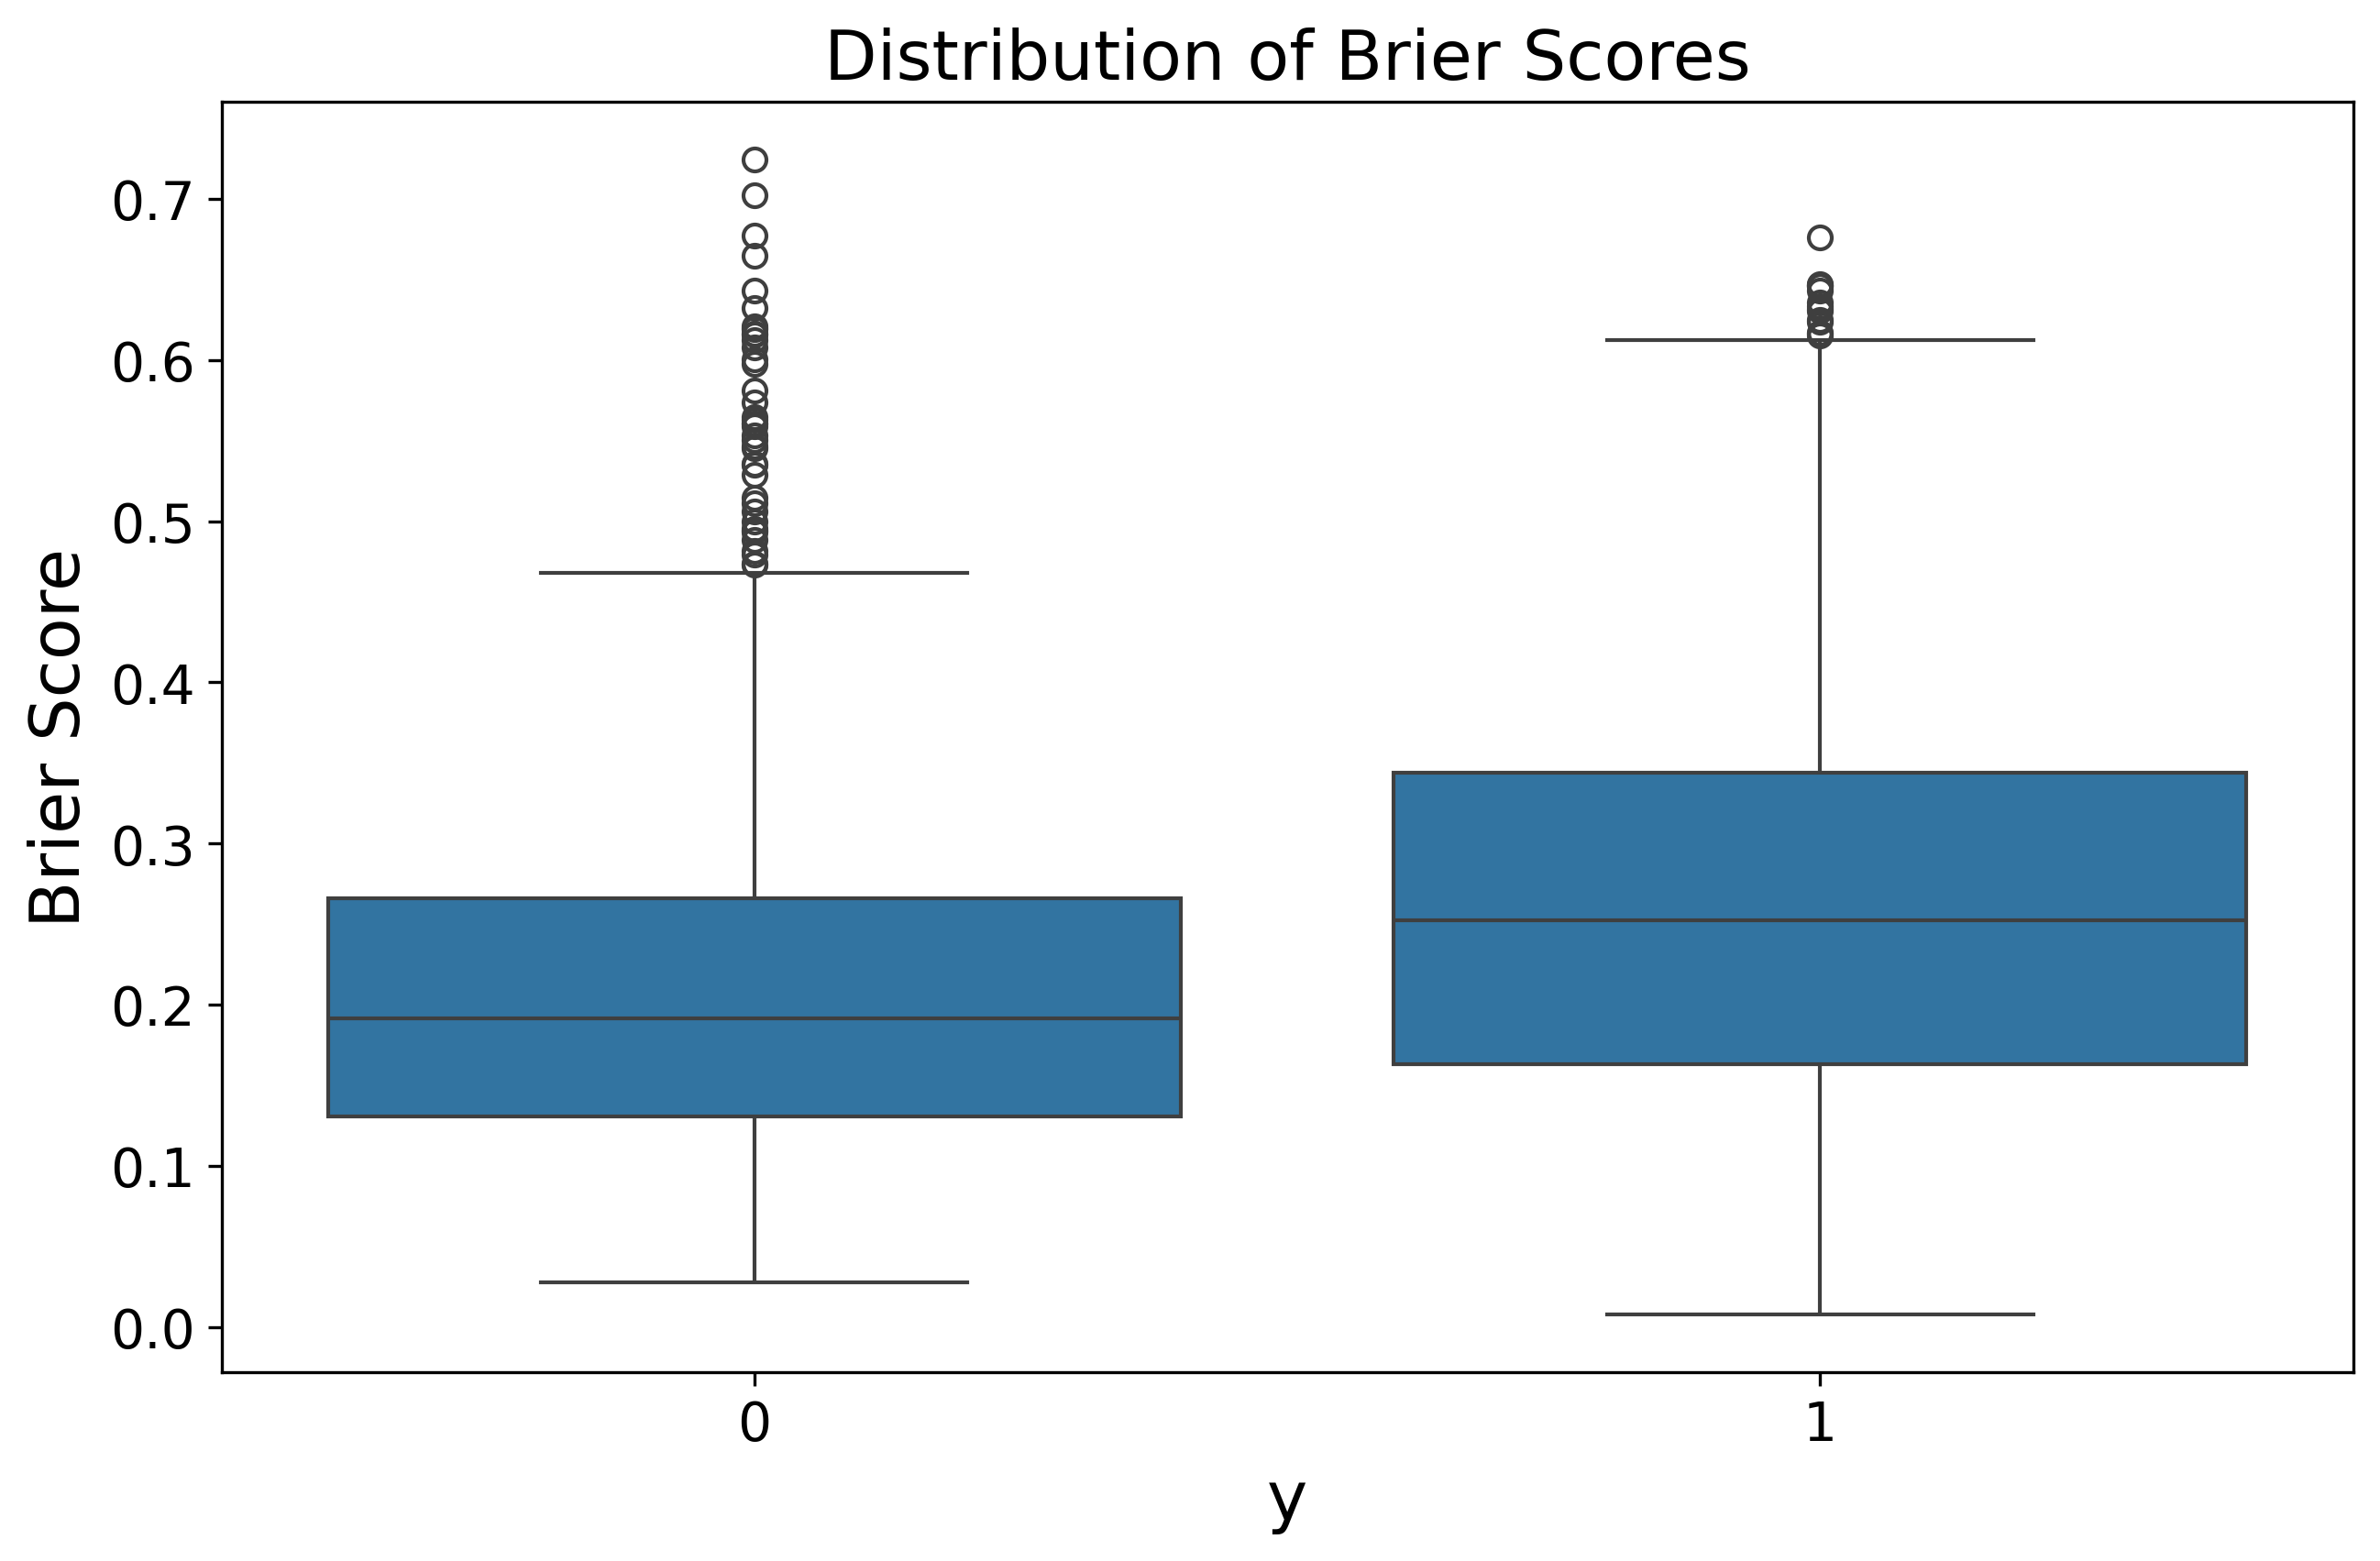


Mean Brier Score per cluster:
Cluster
0    0.238286
1    0.282014
2    0.256695
Name: Brier_Score, dtype: float64
Number of observations per cluster:
Cluster
0    2970
1     481
2     358
Name: count, dtype: int64


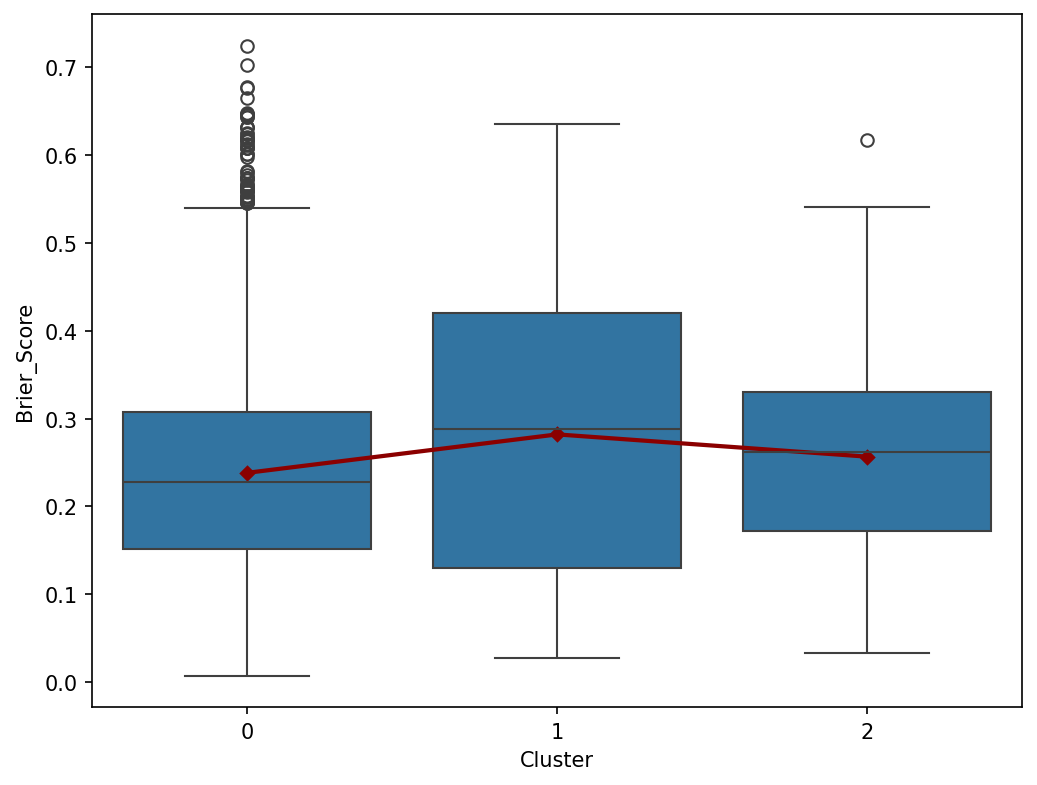

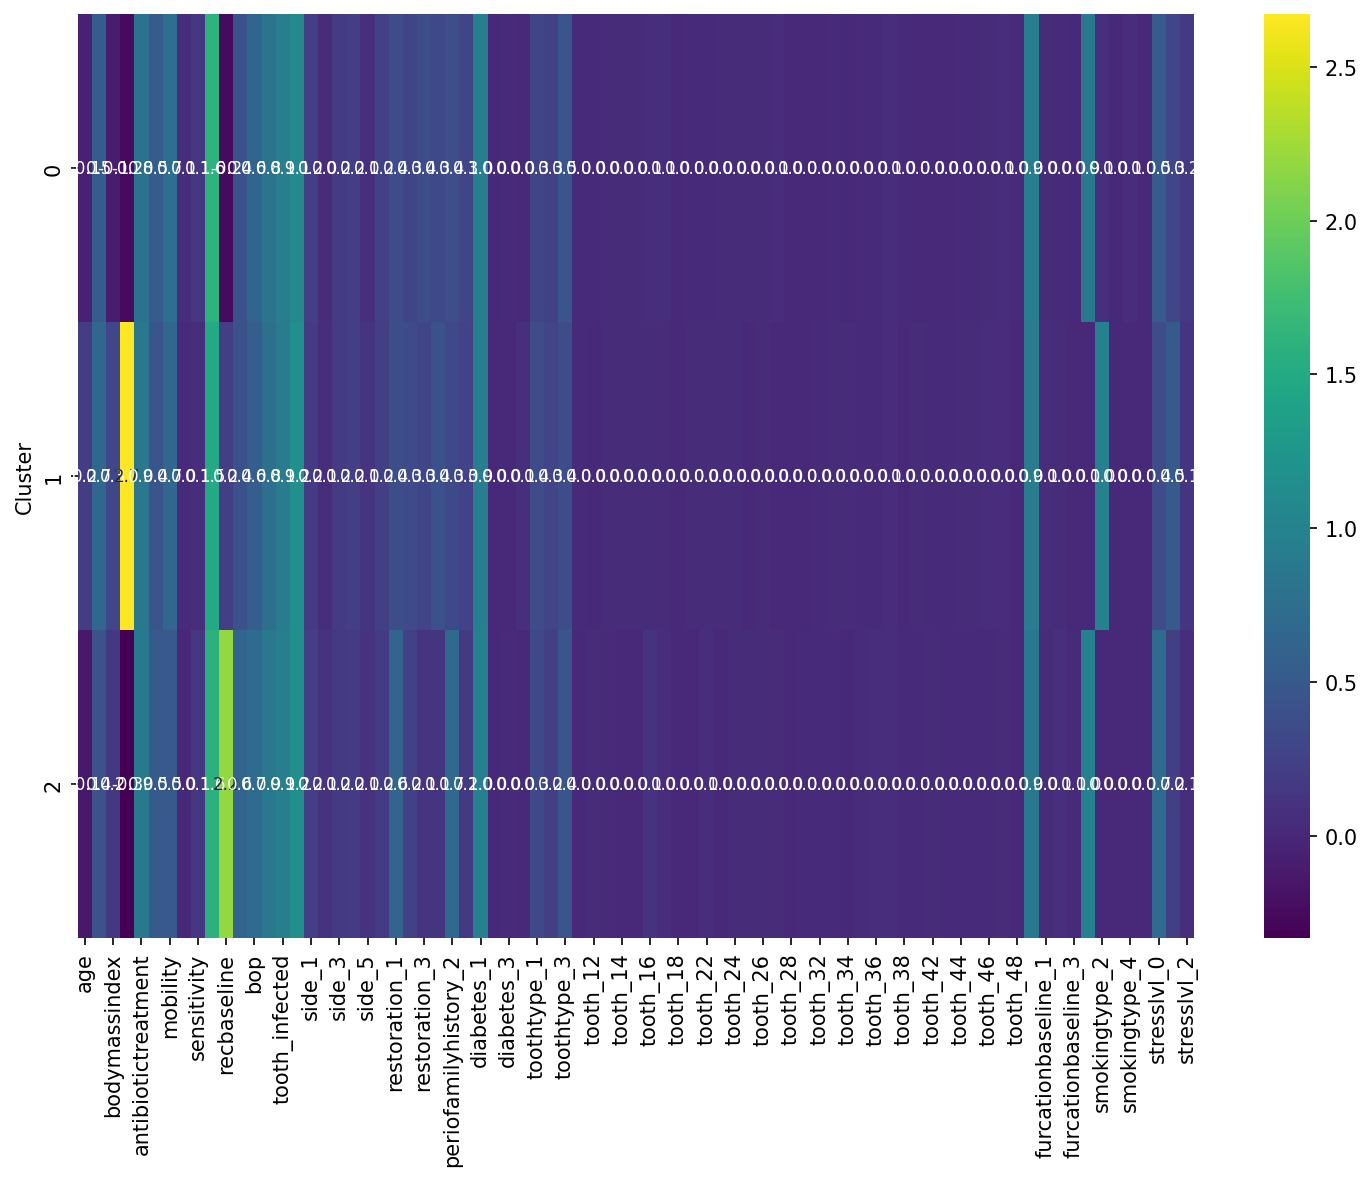

In [4]:
evaluator = wrapper.wrapped_evaluator(
    learners_dict=learners, criterion="f1", aggregate=False
)

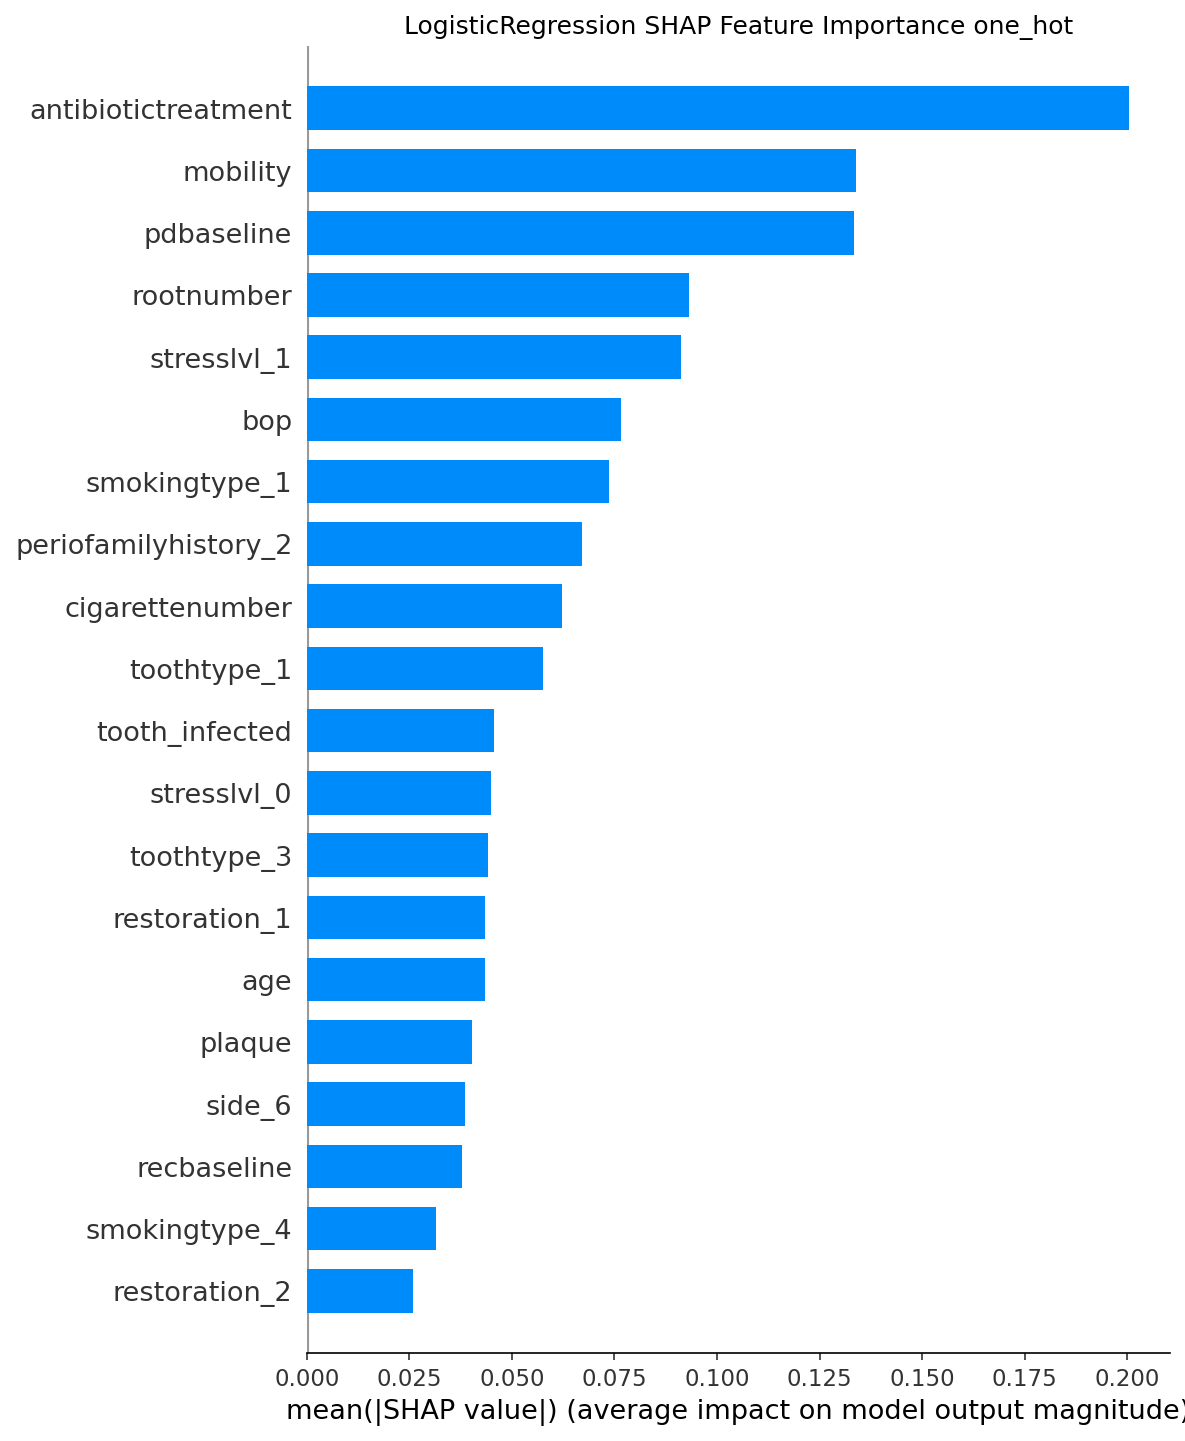

In [5]:
wrapper.evaluate_feature_importance(evaluator=evaluator, importance_types=["shap"])